In [1]:
import numpy as np
import pandas as pd
import os
from IPython.display import Image
from subprocess import Popen, PIPE

xbin = pd.DataFrame(data=np.logspace(-5, np.log10(230), 100))
ybin = pd.DataFrame(np.linspace(0,180,100))

xbin.to_csv('xbin.txt',header=None,index=None)
ybin.to_csv('ybin.txt',header=None,index=None)


In [2]:
Data = pd.read_table('Distribution_QGSP_BIC_HP_Degrador_210.00MeV.txt',
                     header=None,index_col=None,
                     names=['Energy','Px','Py','Pz','Theta','Phi'])

data=Data[['Energy', 'Theta']]
data['Theta'].apply(lambda x: x*180/np.pi)

data.to_csv('data.txt',header=None,index=None,sep=' ')

filename = 'histo2d_test'

In [3]:
cmd=f"root -q -b -l 'create_histogram2d.cpp(\"{filename}\")'"
os.system(cmd)
os.remove('xbin.txt')
os.remove('ybin.txt')
os.remove('data.txt')


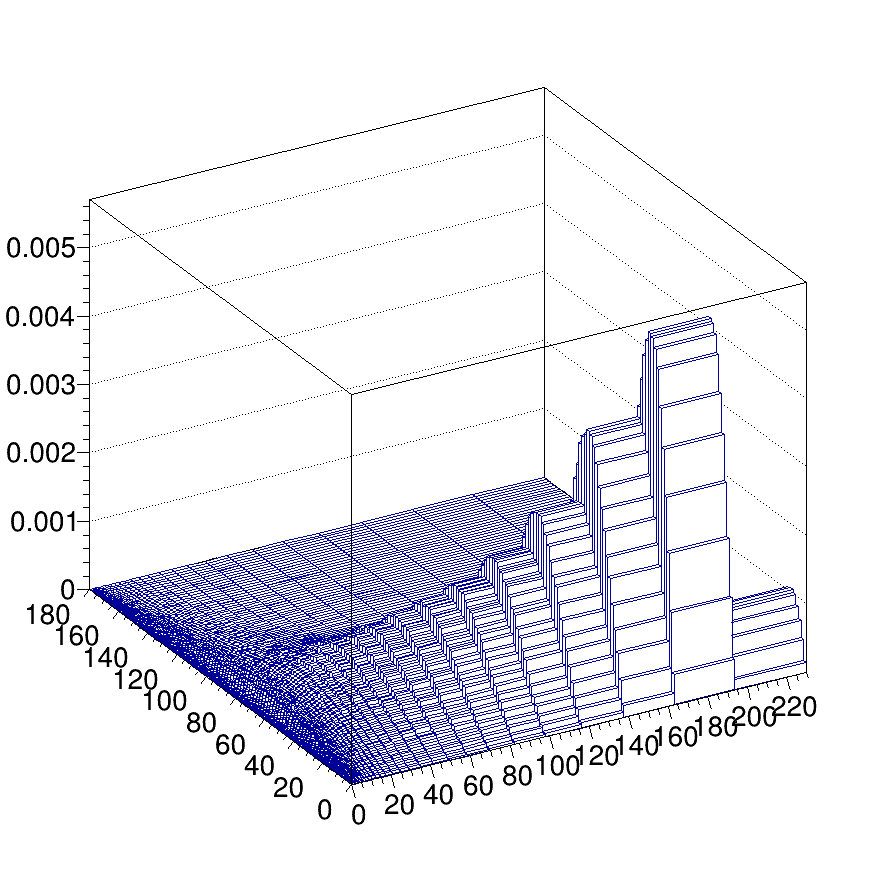

In [5]:
Image(filename+".png")